In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import NMF

from sklearn.metrics import roc_curve, auc

In [2]:
# filepaths for dataset (UPDATE THESE TO WHERE YOU HAVE PLACED THE DATASETS IN YOUR DIRECTORIES)
# filepath for ratings.csv
ratings_file_path = "/Users/ryanli/Documents/ECE_219/workspace/Project_3/ml-latest-small/ratings.csv"
# filepath for movies.csv
movies_file_path = "/Users/ryanli/Documents/ECE_219/workspace/Project_3/ml-latest-small/movies.csv"

In [4]:
#1

ratings = pd.read_csv(ratings_file_path)

user_id = ratings['userId'].values
movie_id = ratings['movieId'].values
rating = ratings['rating'].values

sparsity = len(ratings)/float(len(set(movie_id))*len(set(user_id)))
print("Sparsity: ", sparsity)

Sparsity:  0.016999683055613623


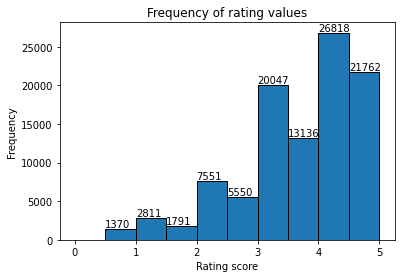

In [41]:
#2

bins = np.linspace(0,5,num=11)
density, bins, _ = plt.hist(rating,bins=bins,edgecolor="black")
count, _ = np.histogram(rating, bins)
plt.xlabel("Rating score"); plt.ylabel("Frequency"); plt.title("Frequency of rating values")
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+250, num)

Text(0.5, 1.0, 'Number of ratings for each movie index')

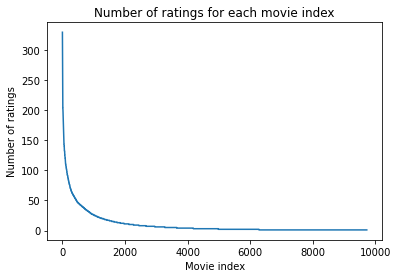

In [42]:
#3

from collections import Counter

counter = Counter(movie_id)
num_ratings = sorted(list(counter.values()),reverse=True)
plt.plot(num_ratings)
plt.xlabel("Movie index"); plt.ylabel("Number of ratings"); plt.title("Number of ratings for each movie index")

Text(0.5, 1.0, 'Number of ratings for each user index')

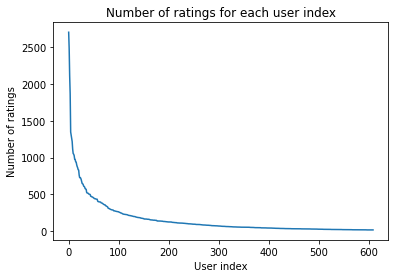

In [43]:
#4

counter = Counter(user_id)
num_users = sorted(list(counter.values()),reverse=True)
plt.plot(num_users)
plt.xlabel("User index"); plt.ylabel("Number of ratings"); plt.title("Number of ratings for each user index")

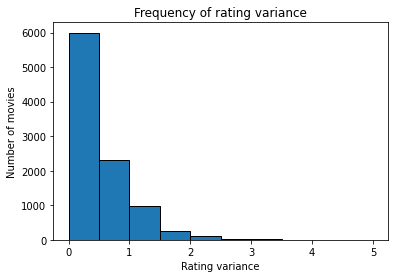

In [5]:
#6

from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file(ratings_file_path, reader=reader)

ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

var = {}
for i in ref.keys():
    var[i] = np.var(ref[i])

var_val = list(var.values())
bins = np.linspace(0,5,num=11)
plt.figure()
plt.hist(var_val,bins=bins,edgecolor="black")
plt.xlabel("Rating variance"); plt.ylabel("Number of movies"); plt.title("Frequency of rating variance")
plt.show()


In [6]:
k = np.linspace(2,100,num=50,dtype=int)
print(k)

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Computing the pearson similarity matrix...
Done computing similarity matrix.
66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
68
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matr

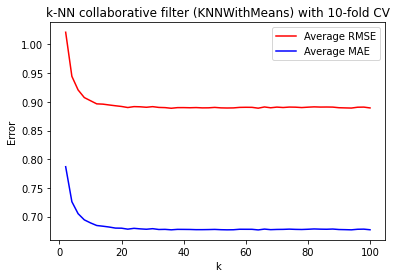

In [19]:
#10

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
data = Dataset.load_from_file(ratings_file_path, reader=reader)

avg_rmse = []
avg_mae = []
k = np.linspace(2,100,num=50,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(KNNWithMeans(k=i,sim_options={'name':'pearson'},random_state=100),data,cv=10,measures=['rmse','mae'])
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
print(avg_rmse)
print(avg_mae)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
[1.0103508226560427, 0.930529116293707, 0.9046168344936663, 0.8921296011354825, 0.8853861488297143, 0.881095083733882, 0.8783867341523657, 0.8766059521246362, 0.8755199649256025, 0.8747405546573267, 0.8741508128897415, 0.873698522924966, 0.8732795714826865, 0.8729570882531886, 0.8727848488136758, 0.872742969603608, 0.8726222860233473, 0.8726105034170055, 0.8725585431408837, 0.8725297543179018, 0.8725337675147173, 0.8725350442378008, 0.8725492931344532, 0.8726019243207501, 0.8726566860346443, 0.8727143801581647, 0.8727379986148879, 0.8727379710771377, 0.8727724780755599, 0.872820010223293, 0.872871580972163, 0.8729142009381172, 0.8729544668644718, 0.8729733338315624, 0.8730200158293275, 0.8730474723324342, 0.873086466625103, 0.8731143324850477, 0.8731370077373549, 0.8731554489371358, 0.873181165045753, 0.8732014902127313, 0.8732201314160999, 

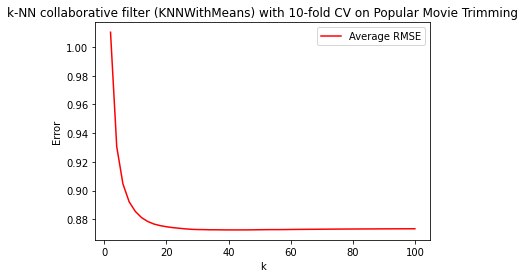

In [68]:
#12

from surprise.model_selection import KFold
from surprise import accuracy

kf = KFold(n_splits=10,random_state=0)
k = np.linspace(2,100,num=50,dtype=int)
avg_rmse_pop_trim = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_pop_trim.append(rmse/10.0)

print(avg_rmse_pop_trim)
print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse_pop_trim), " at k = ", (avg_rmse_pop_trim.index(min(avg_rmse_pop_trim))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_pop_trim, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
[1.1145680612599873, 1.1107875887355436, 1.1125403354393435, 1.1176547362602804, 1.1154961654291564, 1.1138670543147584, 1.1162364666174187, 1.1188244959652809, 1.1221490458464414, 1.112631289980833, 1.1204248024610624, 1.1131313168500874, 1.1106640525654403, 1.1158196772083777, 1.1145391730314227, 1.1202161576493626, 1.109950673489148, 1.1189789201563154, 1.109157853482604, 1.1181284509456832, 1.1172317308058664, 1.113717300708899, 1.1176037999015105, 1.1185651920317734, 1.1205660268697153, 1.113645948715984, 1.1175357039268623, 1.1156543306515345, 1.1127418633457007, 1.1129533349891312, 1.118586853612395, 1.1130935747284387, 1.1167141495921429, 1.1210714301367735, 1.1152630129051833, 1.1168819849813703, 1.1139970155467602, 1.1175803434766933, 1.1162354773390444, 1.1212975516965684, 1.1137254051715995, 1.1139494248083615, 1.1134285869341258

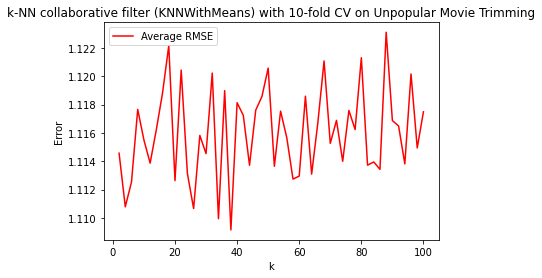

In [70]:
#13

kf = KFold(n_splits=10)
k = np.linspace(2,100,num=50,dtype=int)
avg_rmse_unpop_trim = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_unpop_trim.append(rmse/10.0)


print(avg_rmse_unpop_trim)
print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse_unpop_trim), " at k = ", (avg_rmse_unpop_trim.index(min(avg_rmse_unpop_trim))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_unpop_trim, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on Unpopular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
[1.6181321643886968, 1.6018077556318677, 1.5528601201699934, 1.6317501551479006, 1.5183925160648015, 1.5796669937179988, 1.5618142350208557, 1.5313335460095474, 1.5990153675914969, 1.5539211485547448, 1.454116371848785, 1.520763490907779, 1.573490361579807, 1.5475490472730773, 1.5298613666814729, 1.5228903981458246, 1.5408498768475838, 1.5464154259520118, 1.5229033408753934, 1.4906128785806243, 1.5401089723656538, 1.5576452762803827, 1.5422785967075374, 1.5838331607222926, 1.462650363119511, 1.5333331935107133, 1.5643053089911574, 1.5994530851065867, 1.5136345916764913, 1.5618470654437964, 1.5427985455251616, 1.5361568600745774, 1.5802201567439815, 1.5272763601628019, 1.5878540265603074, 1.5431272122487367, 1.5438526581925571, 1.5417575464354296, 1.5585009905531009, 1.5105113134454258, 1.5567950585133385, 1.5505526747655074, 1.53179059393379

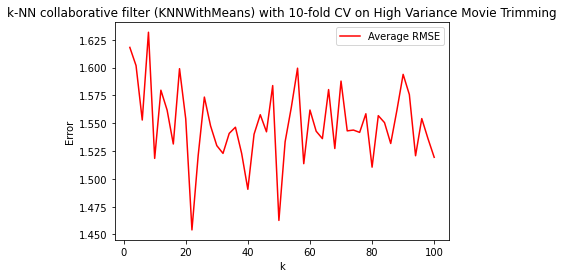

In [72]:
#14

kf = KFold(n_splits=10)
k = np.linspace(2,100,num=50,dtype=int)
avg_rmse_highvar_trim = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_highvar_trim.append(rmse/10.0)

print(avg_rmse_highvar_trim)
print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse_highvar_trim), " at k = ", (avg_rmse_highvar_trim.index(min(avg_rmse_highvar_trim))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_highvar_trim, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV on High Variance Movie Trimming")
plt.show()

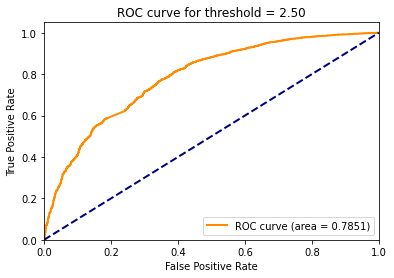

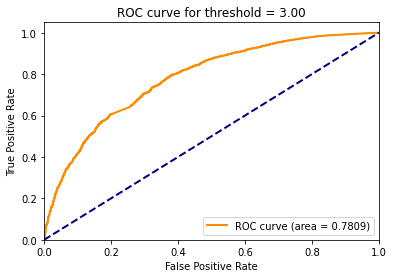

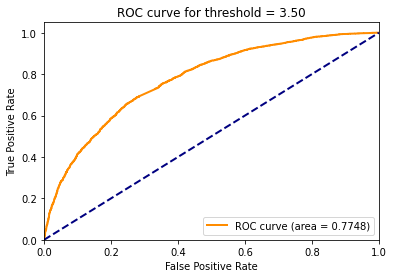

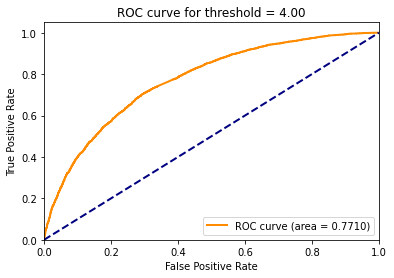

In [17]:
#15

from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

trainset, testset = train_test_split(data, test_size=.1,random_state=100)
pred = KNNWithMeans(k=22,sim_options={'name':'pearson','user_based':True},random_state=100,verbose=False).fit(trainset).test(testset)
y_true = []

threshes = [2.5, 3.0, 3.5, 4.0]
for thresh in threshes:
    y_true=[]
    for i in pred:
        if i.r_ui < thresh:
            y_true.append(0)
        else:
            y_true.append(1)

    y_score = [i.est for i in pred]
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
    plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE:  0.9127332160695465  at k =  16
Minimum average MAE:  0.6935864182157554  at k =  20


Text(0.5, 1.0, 'NMF collaborative filter with 10-fold CV')

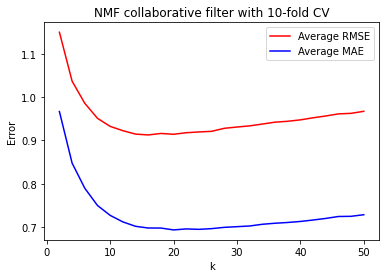

In [22]:
#17

from surprise.prediction_algorithms.matrix_factorization import NMF

avg_rmse_nmf = []
avg_mae_nmf = []
k = np.linspace(2,50,num=25,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(NMF(n_factors=i,verbose=False,random_state=100),data,cv=10)
    avg_rmse_nmf.append(np.mean(perf['test_rmse']))
    avg_mae_nmf.append(np.mean(perf['test_mae']))

print("Minimum average RMSE: ", min(avg_rmse_nmf), " at k = ", (avg_rmse_nmf.index(min(avg_rmse_nmf))+1)*2)
print("Minimum average MAE: ", min(avg_mae_nmf), " at k = ", (avg_mae_nmf.index(min(avg_mae_nmf))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_nmf, 'r', label='Average RMSE')
ax.plot(k, avg_mae_nmf, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV")

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Popular Movie Trimming:  0.8920375128969351  at k =  18


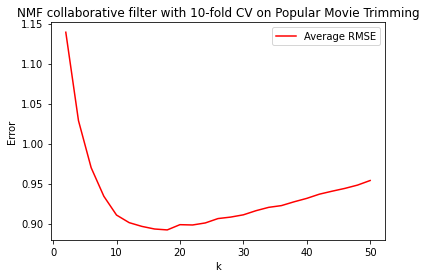

In [27]:
#19

kf = KFold(n_splits=10,random_state=100)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse_nnmf_pop = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = NMF(n_factors=i,verbose=False,random_state=100).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_nnmf_pop.append(rmse/10.0)

print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse_nnmf_pop), " at k = ", (avg_rmse_nnmf_pop.index(min(avg_rmse_nnmf_pop))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_nnmf_pop, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Unpopular Movie Trimming:  1.1732328715916547  at k =  50


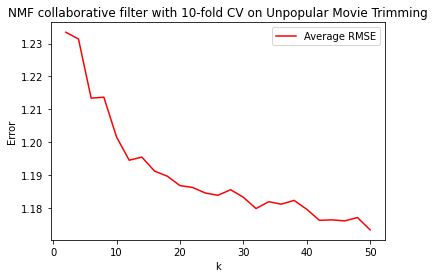

In [28]:
#20

kf = KFold(n_splits=10,random_state=100)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse_nnmf_unpop = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = NMF(n_factors = i,verbose=False,random_state=100).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_nnmf_unpop.append(rmse/10.0)

print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse_nnmf_unpop), " at k = ", (avg_rmse_nnmf_unpop.index(min(avg_rmse_nnmf_unpop))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_nnmf_unpop, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on Unpopular Movie Trimming")
plt.show()


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for High variance Movie Trimming:  1.6221769621510282  at k =  8


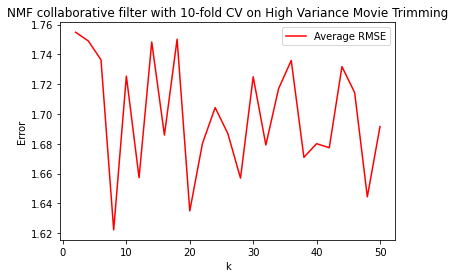

In [29]:
#21

kf = KFold(n_splits=10,random_state=100)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse_nnmf_highvar = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = NMF(n_factors=i,verbose=False,random_state=100).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse_nnmf_highvar.append(rmse/10.0)

print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse_nnmf_highvar), " at k = ", (avg_rmse_nnmf_highvar.index(min(avg_rmse_nnmf_highvar))+1)*2)
fig, ax = plt.subplots()
ax.plot(k,avg_rmse_nnmf_highvar, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("NMF collaborative filter with 10-fold CV on High Variance Movie Trimming")
plt.show()

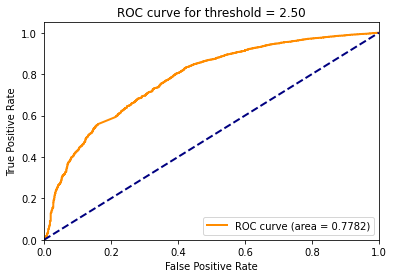

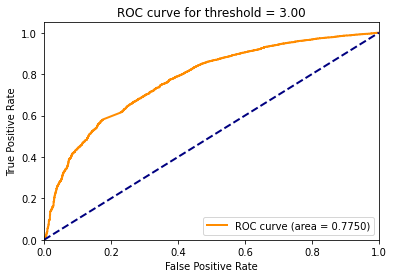

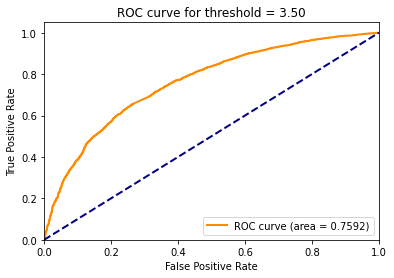

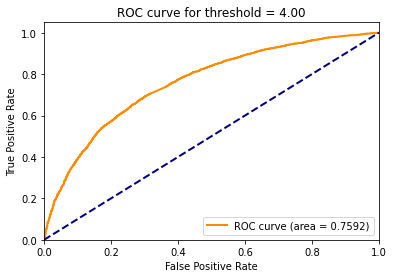

In [7]:
#22

trainset, testset = train_test_split(data, test_size=.1,random_state=100)
pred = NMF(n_factors=16,verbose=False,random_state=100).fit(trainset).test(testset)
y_true = []
threshes = [2.5, 3.0, 3.5, 4.0]
for thresh in threshes:
    y_true=[]
    for i in pred:
        if i.r_ui < thresh:
            y_true.append(0)
        else:
            y_true.append(1)

    y_score = [i.est for i in pred]
    fpr = dict();tpr = dict();roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
    plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
    plt.show()

In [25]:
mov = V[:,0]
mov1 = [(n,j) for n,j in enumerate(mov)]
mov1.sort(key = lambda x:x[1], reverse=True)

In [26]:
mov1[:10]

[(4415, 2.399790712538619),
 (4504, 1.8837911076846814),
 (3758, 1.877222147002238),
 (8276, 1.8475416216122789),
 (4708, 1.7973455485487888),
 (3315, 1.7956947391953058),
 (339, 1.7937593819632018),
 (947, 1.7859860857689265),
 (3992, 1.7472635844124982),
 (6085, 1.7329590049093164)]

In [27]:
#23

trainset, testset = train_test_split(data, test_size=.1,random_state=100)
nmf = NMF(n_factors=20,verbose=False,random_state=100)
nmf.fit(trainset).test(testset)
V = nmf.qi
k = [item for item in range(0,20)]
df = pd.read_csv(movies_file_path,names=['movieid','title','genres'],header=0)
for i in k:
    print(i)
    mov = V[:,i]
    mov1 = [(n,j) for n,j in enumerate(mov)]
    mov1.sort(key = lambda x:x[1], reverse=True)
    for a in mov1[:10]:
        print(df['genres'][a[0]])

0
Drama
Comedy|Drama|Fantasy
Comedy|Romance
Action|Crime|Thriller
Drama|War
Drama|Romance
Drama|Horror|Romance|Thriller
Crime|Film-Noir|Thriller
Drama
Comedy|War
1
Comedy
Drama
Adventure|Children|Drama
Comedy
Action|Crime|Drama|Thriller
Comedy|Drama
Mystery|Thriller
Documentary
Drama
Adventure|Comedy|Fantasy
2
Action|Crime|Drama
Drama|Romance
Action|Crime|Thriller
Adventure|Children|Drama
Comedy|Drama
Romance
Drama
Drama|War
Drama|Mystery|Thriller
Documentary|Musical
3
Drama|Musical|Romance
Action|Crime|Drama|Thriller
Horror|Thriller
Comedy|Romance
Adventure|Animation|Children|Comedy|Fantasy|Musical|Romance
Action|Horror|Thriller
Action|Adventure|Comedy
Comedy|Drama|Romance
Comedy|Drama|Romance
Drama
4
Comedy
Drama|War
Adventure|Comedy
Crime|Drama|Mystery|Thriller
Action|Adventure|Sci-Fi|Thriller
Comedy|Drama
Drama
Animation|Children|Fantasy|IMAX
Drama|Romance
Crime|Drama|Thriller
5
Action|Adventure|Thriller
Drama|War
Comedy
Comedy|Crime|Thriller
Drama|Mystery
Drama|Romance
Action|Adve

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE:  0.8652083390716919
Minimum average MAE:  0.6642001956535919


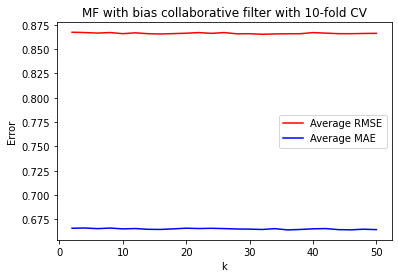

In [22]:
#24

from surprise.prediction_algorithms.matrix_factorization import SVD

avg_rmse = []
avg_mae = []
k = np.linspace(2,50,num=25,dtype=int)
for i in k:
    print(i)
    perf = cross_validate(SVD(n_factors=i,verbose=False),data,cv=10)
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

print("Minimum average RMSE: ", min(avg_rmse))
print("Minimum average MAE: ", min(avg_mae))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.plot(k, avg_mae, 'b', label='Average MAE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Popular Movie Trimming:  0.8574484812310328


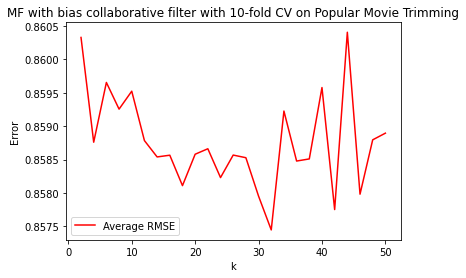

In [23]:
#26

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = SVD(n_factors=i,verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Popular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on Popular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for Unpopular Movie Trimming:  0.9706730162042637


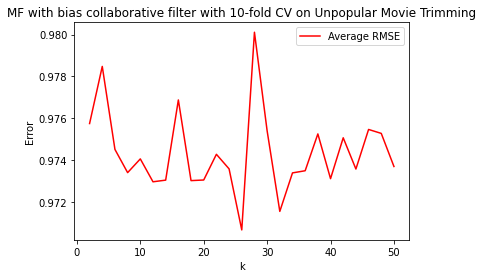

In [24]:
#27

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = SVD(n_factors = i,verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for Unpopular Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on Unpopular Movie Trimming")
plt.show()

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
Minimum average RMSE for High variance Movie Trimming:  1.4292730381587788


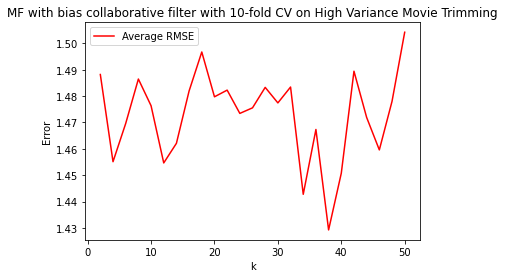

In [25]:
#28

kf = KFold(n_splits=10)
k = np.linspace(2,50,num=25,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    print(i)
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = SVD(n_factors=i,verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    avg_rmse.append(rmse/10.0)

print("Minimum average RMSE for High variance Movie Trimming: ", min(avg_rmse))
fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.legend(loc='best')
plt.xlabel("k"); plt.ylabel("Error"); plt.title("MF with bias collaborative filter with 10-fold CV on High Variance Movie Trimming")
plt.show()

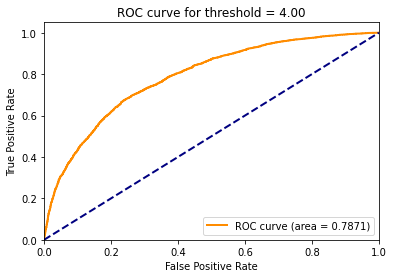

In [26]:
#29

trainset, testset = train_test_split(data, test_size=.1)
pred = SVD(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 4
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

In [27]:
#30

from sklearn.metrics import mean_squared_error

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pred = [user[i[0]] for i in testset]
    true = [i[2] for i in testset]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter: ", avg_rmse)

Average RMSE for naive collaborative filter:  0.9347033620738958


In [28]:
#31

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pop_trim = [j for j in testset if len(ref1[j[1]]) > 2]
    pred = [user[i[0]] for i in pop_trim]
    true = [i[2] for i in pop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Popular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Popular Movie Trimming:  0.9323124182963666


In [29]:
#32

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    unpop_trim = [j for j in testset if len(ref1[j[1]]) <= 2]
    pred = [user[i[0]] for i in unpop_trim]
    true = [i[2] for i in unpop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Unpopular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Unpopular Movie Trimming:  0.9714753648149612


In [30]:
#33

ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    highvar_trim = [j for j in testset if (len(ref1[j[1]]) >= 5 and np.var(ref1[j[1]]) >= 2)]
    pred = [user[i[0]] for i in highvar_trim]
    true = [i[2] for i in highvar_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with High Variance Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with High Variance Movie Trimming:  1.4807566584608713


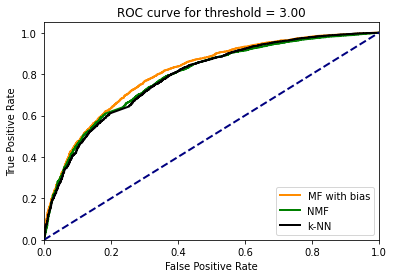

In [31]:
#34

trainset, testset = train_test_split(data, test_size=.1)

pred = SVD(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
thresh = 3
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2; plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='MF with bias')

pred = NMF(n_factors=18,verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2
plt.plot(fpr, tpr, color='green',lw=lw, label='NMF')

pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
y_true = []
for i in pred:
    if i.r_ui < thresh:
        y_true.append(0)
    else:
        y_true.append(1)

y_score = [i.est for i in pred]
fpr = dict();tpr = dict();roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_true, y_score)
lw = 2
plt.plot(fpr, tpr, color='black',lw=lw, label='k-NN')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate');
plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
plt.show()

1
[0.9292464185554685]
[0.21967395208091597]
2
[0.9292464185554685, 0.9149665567799424]
[0.21967395208091597, 0.3516961925056588]
3
[0.9292464185554685, 0.9149665567799424, 0.914627279408364]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603]
4
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596]
5
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596, 0.47137370083176194]
6
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694, 0.9072717798291995]
[0.21967395208091597, 0.3516961925056588, 0.41991376891466603, 0.449043154804596, 0.47137370083176194, 0.48316484056818415]
7
[0.9292464185554685, 0.9149665567799424, 0.914627279408364, 0.9120371776974581, 0.9104033791167694, 0.9072717798291995, 0.908130

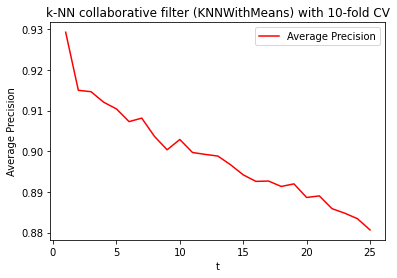

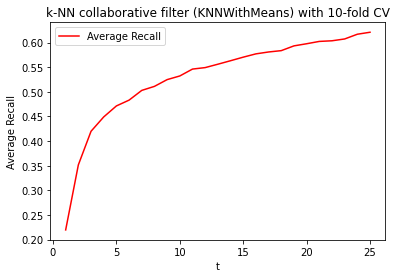

No handles with labels found to put in legend.


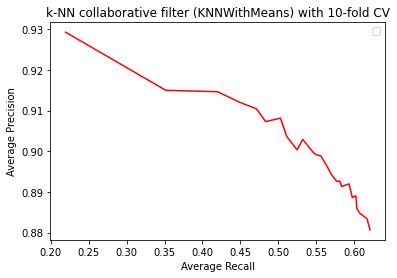

In [32]:
#36

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_knn = []
avg_recall_knn = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_knn.append(np.mean(precision_fold))
    avg_recall_knn.append(np.mean(recall_fold))
    print(avg_precision_knn)
    print(avg_recall_knn)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_knn, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_knn, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_knn,avg_precision_knn, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("k-NN collaborative filter (KNNWithMeans) with 10-fold CV")
plt.show()

1
[0.9292742434952569]
[0.22312972299285772]
2
[0.9292742434952569, 0.917514854050902]
[0.22312972299285772, 0.35042124874658565]
3
[0.9292742434952569, 0.917514854050902, 0.9106169407986711]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498]
4
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074]
5
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074, 0.4688791304742005]
6
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927, 0.9037580221086344]
[0.22312972299285772, 0.35042124874658565, 0.4173442277792498, 0.4501649519682074, 0.4688791304742005, 0.48050281980175813]
7
[0.9292742434952569, 0.917514854050902, 0.9106169407986711, 0.9087761314937394, 0.9073009623881927, 0.9037580221086344, 0.90333

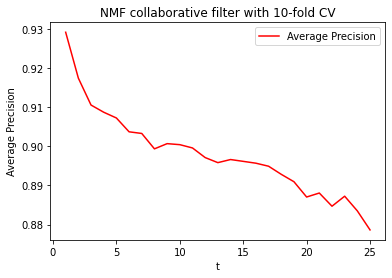

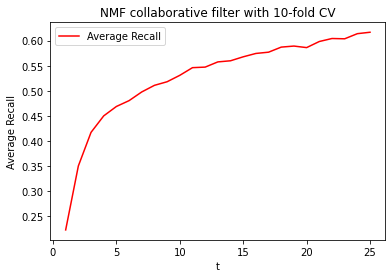

No handles with labels found to put in legend.


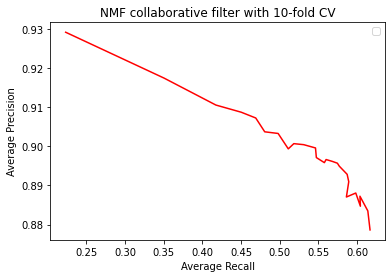

In [33]:
#37

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_nmf = []
avg_recall_nmf = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = NMF(n_factors=20,verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_nmf.append(np.mean(precision_fold))
    avg_recall_nmf.append(np.mean(recall_fold))
    print(avg_precision_nmf)
    print(avg_recall_nmf)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_nmf, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_nmf, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_nmf,avg_precision_nmf, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("NMF collaborative filter with 10-fold CV")
plt.show()

1
[0.9360009152344808]
[0.22262086532897576]
2
[0.9360009152344808, 0.9261131120598831]
[0.22262086532897576, 0.3513378080665678]
3
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084]
4
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944]
5
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944, 0.4706140838039595]
6
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331, 0.9088996044138344]
[0.22262086532897576, 0.3513378080665678, 0.41270348404244084, 0.4518670013844944, 0.4706140838039595, 0.48298810819405585]
7
[0.9360009152344808, 0.9261131120598831, 0.9183288826276265, 0.9150854095845122, 0.912941009185331, 0.9088996044138344, 0.910

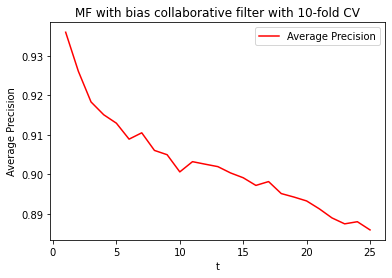

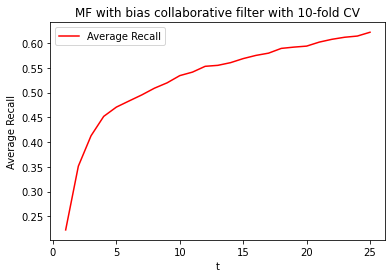

No handles with labels found to put in legend.


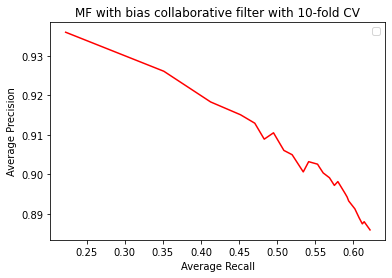

In [34]:
#38

t = np.linspace(1,25,num=25,dtype=int)
avg_precision_svd = []
avg_recall_svd = []
kf = KFold(n_splits=10)
for i in t:
    print(i)
    precision_fold = []
    recall_fold = []
    for trainset, testset in kf.split(data):
        G = {}
        for j in testset:
            if j[0] in G.keys():
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
            else:
                G[j[0]] = set()
                if j[2] >= 3.0:
                    G[j[0]].add(j[1])
        G_items = {}
        for j in testset:
            if j[0] in G_items.keys():
                G_items[j[0]].append(j[1])
            else:
                G_items[j[0]] = []
                G_items[j[0]].append(j[1])
        G_test = [j for j in testset if (len(G[j[0]]) > 0 and len(G_items[j[0]]) >= i)]
        pred = SVD(n_factors=18,verbose=False).fit(trainset).test(G_test)
        user = {}
        for u in pred:
            if u[0] in user.keys():
                item = (u[1],u[3])
                user[u[0]].append(item)
            else:
                user[u[0]] = []
                item = (u[1],u[3])
                user[u[0]].append(item)
        precision_user = []
        recall_user = []
        for u in user.keys():
            S = user[u]
            S = sorted(S,key=lambda x:x[1],reverse=True)
            S = S[:i]
            S_t = set([j[0] for j in S])
            G_truth = G[u]
            precision = len(S_t.intersection(G_truth))/float(len(S_t))
            recall = len(S_t.intersection(G_truth))/float(len(G_truth))
            precision_user.append(precision)
            recall_user.append(recall)
        precision_fold.append(np.mean(precision_user))
        recall_fold.append(np.mean(recall_user))
    avg_precision_svd.append(np.mean(precision_fold))
    avg_recall_svd.append(np.mean(recall_fold))
    print(avg_precision_svd)
    print(avg_recall_svd)

fig, ax = plt.subplots()
ax.plot(t,avg_precision_svd, 'r', label='Average Precision')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Precision"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(t,avg_recall_svd, 'r', label='Average Recall')
ax.legend(loc='best')
plt.xlabel("t"); plt.ylabel("Average Recall"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

fig, ax = plt.subplots()
ax.plot(avg_recall_svd,avg_precision_svd, 'r')
ax.legend(loc='best')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("MF with bias collaborative filter with 10-fold CV")
plt.show()

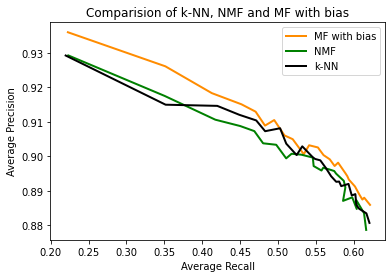

In [35]:
#39

plt.figure()
plt.plot(avg_recall_svd, avg_precision_svd, color='darkorange',lw=2, label='MF with bias')
plt.plot(avg_recall_nmf, avg_precision_nmf, color='green',lw=2, label='NMF')
plt.plot(avg_recall_knn, avg_precision_knn, color='black',lw=2, label='k-NN')
plt.xlabel("Average Recall"); plt.ylabel("Average Precision"); plt.title("Comparision of k-NN, NMF and MF with bias")
plt.legend(loc="best")
plt.show()